In [12]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f92d9654-2a4b-4e24-a66e-5cc8f3f39ca5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2023-04-05T00:23:17.255Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 9117}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10141, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [14]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933737e+07,1.933737e+07,NaN,1,NaN,NaN,None,2023-04-05T00:20:00.000Z,28160.500767,1.516918e+10,-22.5367,0.034324,1.272616,3.174742,25.743837,20.268326,66.799070,5.445500e+11,45.9489,5.913705e+11,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-05T00:20:00.000Z,1871.192377,1.035862e+10,7.2694,0.482669,3.243581,5.405691,19.852939,12.648985,48.684821,2.253997e+11,18.9978,2.253997e+11,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
2,825,Tether,USDT,tether,50676,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.000456e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-05T00:20:00.000Z,1.000202,2.852328e+10,-16.1841,0.004726,0.028094,0.004664,0.009898,0.006134,0.045293,8.002073e+10,6.7502,8.310853e+10,None,2023-04-05T00:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-05 00:23:17.193973
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578876e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-05T00:20:00.000Z,310.831472,5.709520e+08,-19.5631,-0.029100,0.401423,-0.771384,7.929462,-6.390625,20.070307,4.907644e+10,4.1388,4.972681e+10,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
4,3408,USD Coin,USDC,usd-coin,11346,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.270331e+10,3.270331e+10,NaN,5,NaN,NaN,None,2023-04-05T00:20:00.000Z,0.999731,4.030207e+09,-9.9787,0.005767,0.017336,0.000174,-0.023176,-0.029664,-0.031765,3.269451e+10,2.7587,3.269451e+10,None,2023-04-05T00:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-05 00:23:17.193973
5,52,XRP,XRP,xrp,925,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.164939e+10,9.998904e+10,NaN,6,NaN,NaN,None,2023-04-05T00:20:00.000Z,0.500687,1.216307e+09,-26.5058,-0.459036,0.850885,-3.743834,36.475401,21.812343,43.799052,2.586020e+10,2.1809,5.006874e+10,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
6,2010,Cardano,ADA,cardano,760,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475451e+10,3.564336e+10,NaN,7,NaN,NaN,None,2023-04-05T00:20:00.000Z,0.388407,3.819082e+08,-38.5656,-0.513002,0.062035,5.414934,15.631813,-3.523847,44.774831,1.349889e+10,1.1387,1.747831e+10,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
7,74,Dogecoin,DOGE,dogecoin,679,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388063e+11,1.388063e+11,NaN,8,NaN,NaN,None,2023-04-05T00:20:00.000Z,0.093755,3.062661e+09,-13.6841,-1.888519,-1.173261,27.014604,25.992338,1.155369,26.778982,1.301380e+10,1.0969,1.301380e+10,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
8,3890,Polygon,MATIC,polygon,645,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,9,NaN,NaN,None,2023-04-05T00

In [31]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'f92d9654-2a4b-4e24-a66e-5cc8f3f39ca5',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    if not os.path.isfile(r"/Users/cocolee/Documents/DataAnalytics/Python/python code/APIdata.csv"):
        df.to_csv(r"/Users/cocolee/Documents/DataAnalytics/Python/python code/APIdata.csv", header = 'column_names')
    else:
        df.to_csv(r"/Users/cocolee/Documents/DataAnalytics/Python/python code/APIdata.csv", mode='a', header = False)
        # mode = a ##append data, header = False ##so we dont get new headers

In [32]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully.')
    sleep(60) #sleep for 1min
exit()


{'status': {'timestamp': '2023-04-05T00:40:22.539Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9117}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10141, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [33]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.933737e+07,1.933737e+07,NaN,1,NaN,NaN,None,2023-04-05T00:20:00.000Z,28160.500767,1.516918e+10,-22.5367,0.034324,1.272616,3.174742,25.743837,20.268326,66.799070,5.445500e+11,45.9489,5.913705e+11,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-05T00:20:00.000Z,1871.192377,1.035862e+10,7.2694,0.482669,3.243581,5.405691,19.852939,12.648985,48.684821,2.253997e+11,18.9978,2.253997e+11,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
2,825,Tether,USDT,tether,50676,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.000456e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-05T00:20:00.000Z,1.000202,2.852328e+10,-16.1841,0.004726,0.028094,0.004664,0.009898,0.006134,0.045293,8.002073e+10,6.7502,8.310853e+10,None,2023-04-05T00:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-05 00:23:17.193973
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578876e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-05T00:20:00.000Z,310.831472,5.709520e+08,-19.5631,-0.029100,0.401423,-0.771384,7.929462,-6.390625,20.070307,4.907644e+10,4.1388,4.972681e+10,None,2023-04-05T00:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
4,3408,USD Coin,USDC,usd-coin,11346,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.270331e+10,3.270331e+10,NaN,5,NaN,NaN,None,2023-04-05T00:20:00.000Z,0.999731,4.030207e+09,-9.9787,0.005767,0.017336,0.000174,-0.023176,-0.029664,-0.031765,3.269451e+10,2.7587,3.269451e+10,None,2023-04-05T00:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-05 00:23:17.193973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,494,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.173156e+09,1.299635e+09,NaN,11,NaN,NaN,None,2023-04-05T00:53:00.000Z,6.516176,2.078610e+08,-11.8884,1.271899,1.812635,7.381314,8.941106,-7.038664,40.829270,7.644490e+09,0.6372,8.468648e+09,None,2023-04-05T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:54:30.026469
11,4687,Binance USD,BUSD,binance-usd,6523,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,7.290281e+09,7.290281e+09,NaN,12,NaN,NaN,None,2023-04-05T00:53:00.000Z,0.999710,3.038624e+09,-19.5201,0.001662,0.023338,-0.039161,-0.055587,-0.072973,-0.042716,7.288169e+09,0.6075,7.288169e+09,None,2023-04-05T00:53:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-04-05 00:54:30.026469
12,2,Litecoin,LTC,litecoin,899,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.0,7.263379e+07,8.400000e+07,NaN,13,NaN,NaN,None,2023-04-05T00:53:00.000Z,93.225066,4.646798e+08,-33.5830,0.806151,0.631884,4.519450,3.311456,-7.505687,23.519182,6.771290e+09,0.5645,7.830906e+09,None,2023-04-05T00:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-05 00:54:30.026469
13,5994,Shiba Inu,S

In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19337368.00000,19337368.00000,nan,1,nan,nan,None,2023-04-05T00:20:00.000Z,28160.50077,15169176747.37068,-22.53670,0.03432,1.27262,3.17474,25.74384,20.26833,66.79907,544549966403.77539,45.94890,591370516115.69995,None,2023-04-05T00:20:00.000Z,nan,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120457776.00000,120457776.00000,nan,2,nan,nan,None,2023-04-05T00:20:00.000Z,1871.19238,10358616704.98522,7.26940,0.48267,3.24358,5.40569,19.85294,12.64898,48.68482,225399672229.45279,18.99780,225399672229.45001,None,2023-04-05T00:20:00.000Z,nan,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
2,825,Tether,USDT,tether,50676,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",nan,80004564803.04541,83091735571.91554,nan,3,nan,nan,None,2023-04-05T00:20:00.000Z,1.00020,28523282910.12352,-16.18410,0.00473,0.02809,0.00466,0.00990,0.00613,0.04529,80020732050.02057,6.75020,83108526671.45000,None,2023-04-05T00:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-05 00:23:17.193973
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,157887619.57480,159979963.59043,nan,4,nan,nan,None,2023-04-05T00:20:00.000Z,310.83147,570951977.64003,-19.56310,-0.02910,0.40142,-0.77138,7.92946,-6.39062,20.07031,49076441132.06673,4.13880,49726807501.43000,None,2023-04-05T00:20:00.000Z,nan,NaN,NaN,NaN,NaN,2023-04-05 00:23:17.193973
4,3408,USD Coin,USDC,usd-coin,11346,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,32703307930.32591,32703307930.32591,nan,5,nan,nan,None,2023-04-05T00:20:00.000Z,0.99973,4030207203.44359,-9.97870,0.00577,0.01734,0.00017,-0.02318,-0.02966,-0.03177,32694508681.46083,2.75870,32694508681.46000,None,2023-04-05T00:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-05 00:23:17.193973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,494,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",nan,1173155724.23541,1299634601.54059,nan,11,nan,nan,None,2023-04-05T00:53:00.000Z,6.51618,207860950.52673,-11.88840,1.27190,1.81264,7.38131,8.94111,-7.03866,40.82927,7644489530.62783,0.63720,8468648193.82000,None,2023-04-05T00:53:00.000Z,nan,NaN,NaN,NaN,NaN,2023-04-05 00:54:30.026469
11,4687,Binance USD,BUSD,binance-usd,6523,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",nan,7290280643.34338,7290280643.34338,nan,12,nan,nan,None,2023-04-05T00:53:00.000Z,0.99971,3038624185.05102,-19.52010,0.00166,0.02334,-0.03916,-0.05559,-0.07297,-0.04272,7288169445.61789,0.60750,7288169445.62000,None,2023-04-05T00:53:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-04-05 00:54:30.026469
12,2,Litecoin,LTC,litecoin,899,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,72633789.32193,84000000.00000,nan,13,nan,nan,None,2023-04-05T00:53:00.000Z,93.22507,464679830.91014,-33.58300,0.80615,0.63188,4.51945,3.31146,-7.50569,2

In [39]:
df3 = df.groupby('name', sort = False) [['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.99914,2.36093,4.04312,26.44948,21.09078,68.40795
Ethereum,1.65981,5.00603,6.86768,21.09963,14.05082,51.09122
Tether,0.00758,0.00910,-0.02789,0.00287,0.00043,0.03512
BNB,0.31343,0.86235,-0.57589,7.75501,-6.46026,20.69529
USD Coin,0.00649,0.00585,-0.02816,-0.03162,-0.02460,-0.02077
XRP,0.18534,1.93258,-3.32606,36.58775,22.44627,44.96489
Cardano,0.65447,1.19625,6.32631,16.01422,-2.77519,46.46149
Dogecoin,-0.23080,1.09843,28.45714,26.60427,0.63505,28.78635
Polygon,0.89142,4.58245,5.47915,0.99491,-7.67927,42.35241


In [40]:
df4 = df3.stack() #pivoting the columns into a multi-level index
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.99914
         quote.USD.percent_change_24h    2.36093
         quote.USD.percent_change_7d     4.04312
         quote.USD.percent_change_30d   26.44948
         quote.USD.percent_change_60d   21.09078
                                          ...   
TRON     quote.USD.percent_change_24h    0.05873
         quote.USD.percent_change_7d     2.69715
         quote.USD.percent_change_30d   -2.06397
         quote.USD.percent_change_60d    2.95555
         quote.USD.percent_change_90d   20.57728
Length: 90, dtype: float64

In [44]:
type(df3)

pandas.core.frame.DataFrame

In [46]:
type(df4) # we can't work with series, need to convert back to df

pandas.core.series.Series

In [48]:
df5 = df4.to_frame(name='values') # converting df4series into a DataFrame with a single column named "values"
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.99914
        quote.USD.percent_change_24h  2.36093
        quote.USD.percent_change_7d   4.04312
        quote.USD.percent_change_30d 26.44948
        quote.USD.percent_change_60d 21.09078
...                                       ...
TRON    quote.USD.percent_change_24h  0.05873
        quote.USD.percent_change_7d   2.69715
        quote.USD.percent_change_30d -2.06397
        quote.USD.percent_change_60d  2.95555
        quote.USD.percent_change_90d 20.57728

[90 rows x 1 columns]

In [50]:
# now the name is in the index column

df6=df5.reset_index() #reset index to have the default count
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.99914
1,Bitcoin,quote.USD.percent_change_24h,2.36093
2,Bitcoin,quote.USD.percent_change_7d,4.04312
3,Bitcoin,quote.USD.percent_change_30d,26.44948
4,Bitcoin,quote.USD.percent_change_60d,21.09078
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.05873
86,TRON,quote.USD.percent_change_7d,2.69715
87,TRON,quote.USD.percent_change_30d,-2.06397
88,TRON,quote.USD.percent_change_60d,2.95555


In [51]:
df7=df6.rename(columns={'level_1':'percent_change'}) # renaming the column name
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.99914
1,Bitcoin,quote.USD.percent_change_24h,2.36093
2,Bitcoin,quote.USD.percent_change_7d,4.04312
3,Bitcoin,quote.USD.percent_change_30d,26.44948
4,Bitcoin,quote.USD.percent_change_60d,21.09078
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.05873
86,TRON,quote.USD.percent_change_7d,2.69715
87,TRON,quote.USD.percent_change_30d,-2.06397
88,TRON,quote.USD.percent_change_60d,2.95555


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

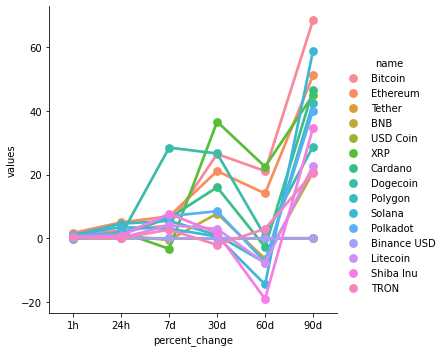

In [54]:
sns.catplot(x='percent_change',y='values', hue='name', data=df7, kind='point')

In [53]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.99914
1,Bitcoin,24h,2.36093
2,Bitcoin,7d,4.04312
3,Bitcoin,30d,26.44948
4,Bitcoin,60d,21.09078
...,...,...,...
85,TRON,24h,0.05873
86,TRON,7d,2.69715
87,TRON,30d,-2.06397
88,TRON,60d,2.95555


In [57]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28160.50077,2023-04-05 00:23:17.193973
0,Bitcoin,28235.52753,2023-04-05 00:31:13.750066
0,Bitcoin,28235.36296,2023-04-05 00:32:13.957901
0,Bitcoin,28253.41332,2023-04-05 00:33:14.147819
0,Bitcoin,28294.27222,2023-04-05 00:34:14.510919
0,Bitcoin,28401.65254,2023-04-05 00:38:24.625468
0,Bitcoin,28401.65254,2023-04-05 00:39:04.272557
0,Bitcoin,28395.23416,2023-04-05 00:40:22.364176
0,Bitcoin,28406.81136,2023-04-05 00:41:22.581416
0,Bitcoin,28437.71141,2023-04-05 00:42:22.780756


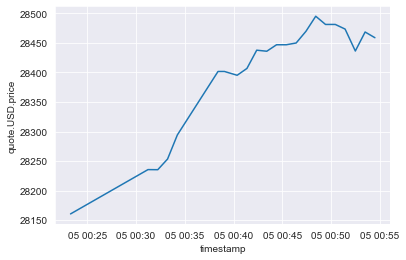

In [63]:
sns.set_style('darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)